In [3]:
##################################################################################################
# Patch-based Classification of Breast Cancer Histology Images using CNNs
# LE48: MiniProject
# Jan Ondras (jo356), Trinity College
# 2017/2018
##################################################################################################
# Show Saliency and grad-CAM

from sklearn.metrics import recall_score, accuracy_score, confusion_matrix
import sys
# import tifffile as tiff
import os
import numpy as np
# from PIL import Image
import os
import matplotlib.pyplot as plt
import cv2
import glob
from keras.preprocessing import image
from keras.utils import to_categorical
from vis.utils import utils
from keras import activations
from keras.models import load_model
from vis.visualization import visualize_saliency, overlay
from vis.utils import utils

test_model_name = './../Model/SN_512_256_x00/SN_512_256_x00_w-50-0.74-0.70-1.01-0.63.hdf5'
# 77.8 on maxprob
model = load_model(test_model_name)
print model.summary()

layer_idx = -1 # utils.find_layer_idx(model, 'predictions')

# Swap softmax with linear
model.layers[layer_idx].activation = activations.linear
model = utils.apply_modifications(model)







_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 254, 254, 16)      448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 84, 84, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 82, 82, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 41, 41, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 41, 41, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 20, 20, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 20, 20, 64)        36928     
__________

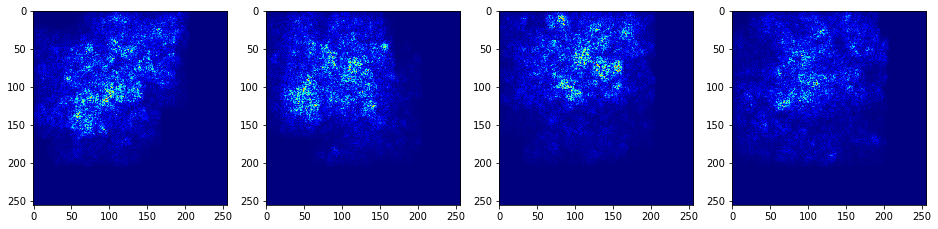

In [33]:
TARGETS = [
'/home/janciovec/Desktop/Patches/notSN/patches_512_256/validation/Normal/n047_0020.tif', 
'/home/janciovec/Desktop/Patches/notSN/patches_512_256/validation/Benign/b047_0006.tif', 
'/home/janciovec/Desktop/Patches/notSN/patches_512_256/validation/InSitu/is004_0001.tif', 
'/home/janciovec/Desktop/Patches/notSN/patches_512_256/validation/Invasive/iv052_0022.tif', 
]

# TARGETS = [
# '/home/janciovec/Desktop/Patches/notSN/patches_512_256/validation/Normal/n046_0010.tif', 
# '/home/janciovec/Desktop/Patches/notSN/patches_512_256/validation/Benign/b039_0016.tif', 
# '/home/janciovec/Desktop/Patches/notSN/patches_512_256/validation/InSitu/is056_0012.tif', 
# '/home/janciovec/Desktop/Patches/notSN/patches_512_256/validation/Invasive/iv017_0006.tif', 
# ]

plt.figure(figsize=(16,6))
# f, ax = plt.subplots(1, 4)
for i, t in enumerate(TARGETS):    
    
    img = utils.load_img(t, target_size=(256, 256))
    
    # 20 is the imagenet index corresponding to `ouzel`
    grads = visualize_saliency(model, layer_idx, filter_indices=0, seed_input=img)
    
    # visualize grads as heatmap
    plt.subplot(1,4,i+1)
    plt.imshow(grads, cmap='jet')
plt.show()

guided


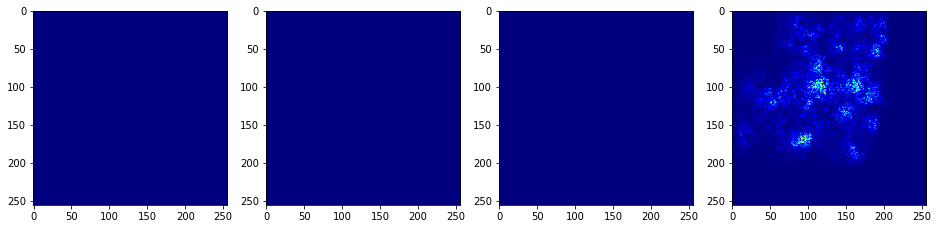

relu


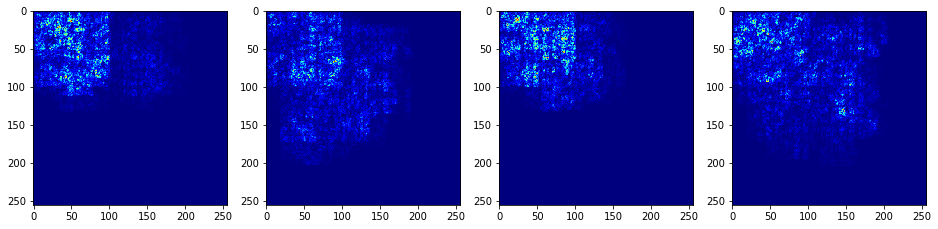

In [26]:
TARGETS = [
'/home/janciovec/Desktop/Patches/notSN/patches_512_256/validation/Normal/n046_0010.tif', 
'/home/janciovec/Desktop/Patches/notSN/patches_512_256/validation/Benign/b039_0016.tif', 
'/home/janciovec/Desktop/Patches/notSN/patches_512_256/validation/InSitu/is056_0012.tif', 
'/home/janciovec/Desktop/Patches/notSN/patches_512_256/validation/Invasive/iv017_0006.tif', 
]

for modifier in ['guided', 'relu']:
    print modifier
    
    plt.figure(figsize=(16,6))
    # f, ax = plt.subplots(1, 4)
    for i, t in enumerate(TARGETS):    

        img = utils.load_img(t, target_size=(256, 256))

        # 20 is the imagenet index corresponding to `ouzel`
        grads = visualize_saliency(model, layer_idx, filter_indices=i, seed_input=img, 
                                  backprop_modifier=modifier)

        # visualize grads as heatmap
        plt.subplot(1,4,i+1)
        plt.imshow(grads, cmap='jet')
    plt.show()
    

vanilla


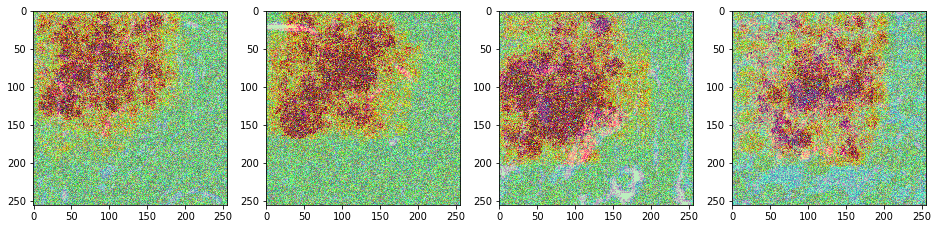

guided


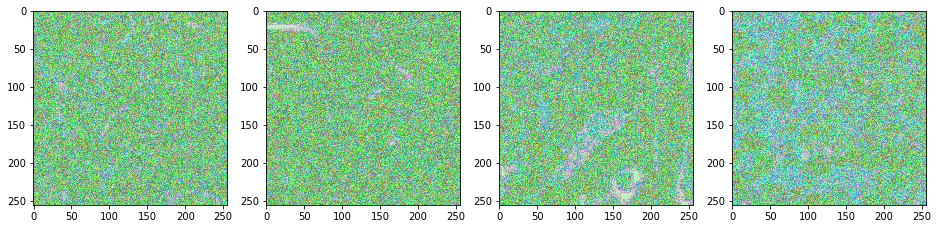

relu


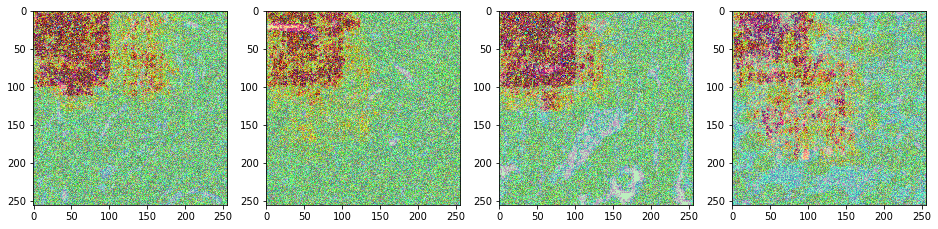

In [31]:
TARGETS = [
'/home/janciovec/Desktop/Patches/notSN/patches_512_256/validation/Normal/n046_0010.tif', 
'/home/janciovec/Desktop/Patches/notSN/patches_512_256/validation/Benign/b039_0016.tif', 
'/home/janciovec/Desktop/Patches/notSN/patches_512_256/validation/InSitu/is056_0012.tif', 
'/home/janciovec/Desktop/Patches/notSN/patches_512_256/validation/Invasive/iv017_0006.tif', 
]

import matplotlib.cm as cm
from vis.visualization import visualize_cam

for modifier in [None, 'guided', 'relu']:
    
    print "vanilla" if modifier is None else modifier
    plt.figure(figsize=(16,6))
    # f, ax = plt.subplots(1, 4)
    for i, t in enumerate(TARGETS):    

        img = utils.load_img(t, target_size=(256, 256))

        # 20 is the imagenet index corresponding to `ouzel`
        grads = visualize_saliency(model, layer_idx, filter_indices=0, seed_input=img, 
                                  backprop_modifier=modifier)

        # visualize grads as heatmap
        plt.subplot(1,4,i+1)
#         print  np.uint8(cm.jet(grads)[:,:,-1, :3] * 255)
        jet_heatmap = np.uint8(cm.jet(grads)[:,:,2, :3] * 255)
#         print jet_heatmap.shape
#         print img.shape
        plt.imshow(overlay(jet_heatmap, img))
    plt.show()
    
    
#     plt.figure()
#     f, ax = plt.subplots(1, 2)
#     plt.suptitle("vanilla" if modifier is None else modifier)
#     for i, img in enumerate([img1, img2]):    
#         # 20 is the imagenet index corresponding to `ouzel`
#         grads = visualize_cam(model, layer_idx, filter_indices=20, 
#                               seed_input=img, backprop_modifier=modifier)        
#         # Lets overlay the heatmap onto original image.    
#         jet_heatmap = np.uint8(cm.jet(grads)[..., :3] * 255)
#         ax[i].imshow(overlay(jet_heatmap, img))